# Group 8

# Miniproject 1

In [1]:
import matplotlib.pyplot as plt, numpy as np
from scipy.stats import linregress

*Each group member has 25% contribution*

## Part (a) Calculating precession rate of mercury's perhelion.

In [14]:
# simulation parameters
pi = np.pi
ti = 0 # start from zero time
tf = 1.0 # years

dt = 0.0001 # about a week step size
N = int(tf/dt) # no steps

t = np.zeros(N)
x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
r  = np.zeros(N)

x[0] = 0.47 # AU
y[0] = 0.0 # AU
vx[0] = 0.0
vy[0] = 8.2 # AU/yr

GM = 4*pi**2
alpha = 0.01

for i in range(N-1):
    r[i] = np.sqrt(x[i]**2 + y[i]**2)
    rcube = r[i]**3
    rsq = x[i]**2 + y[i]**2
    
    # Euler-Cromer
    vx[i+1] = vx[i] - (GM*x[i]/rcube)*(1 + (alpha/rsq))*dt
    x[i+1]  = x[i]  + vx[i+1]*dt

    vy[i+1] = vy[i] - (GM*y[i]/rcube)*(1 + (alpha/rsq))*dt
    y[i+1]  = y[i]  + vy[i+1]*dt

    # Leapfrog
    # xhalf = x[i] + vx[i]*dt/2
    # vx[i+1] = vx[i] - (GM*xhalf/rcube)*(1 + (alpha/rsq))*dt
    # x[i+1]  = xhalf  + vx[i+1]*dt/2

    # yhalf = y[i] + vy[i]*dt/2
    # vy[i+1] = vy[i] - (GM*yhalf/rcube)*(1 + (alpha/rsq))*dt
    # y[i+1]  = yhalf  + vy[i+1]*dt/2

    t[i+1] = t[i] + dt


The rate of change of r , dr/dt, changes sign twice in each cycle. Once at perhilion and then at aphelion. We caluclate all those point where dr/dt changes sign. We store the index of r where the dr/dt sign change happens. But since sign changes twice each cycle, we only need the every other index, so we slice the index array.

In [6]:
index = np.zeros(8)
j=0

# sign change detection loop
for i in range(N-2):
    drdt_current = (r[i+1]-r[i])
    drdt_next = (r[i+2]-r[i+1])

    if drdt_current*drdt_next < 0.0:
        index[j]=i
        # print(i,r[i])
        j=j+1

# slice the index array.
index = index[1::2]

Now we plot the orbit

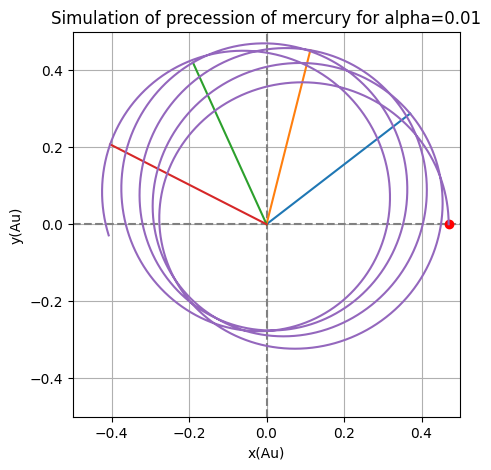

In [15]:
plt.figure(figsize=(5,5))
plt.axhline(0,c='grey',ls='--')
plt.axvline(0,c='grey',ls='--')
plt.plot(x[0],y[0],'ro')
for i in index:
    i = int(i)
    plt.plot([0,x[i]],[0,y[i]])
plt.grid('true')
# plt.legend()
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.xlabel('x(Au)')
plt.ylabel('y(Au)')
plt.title('Simulation of precession of mercury for alpha=0.01')
plt.plot(x,y)

Now we repeat the same procecure for different value of alpha. For each alpha we calulate the angle of each straight line maked on graph. These indicate where one cycle completes. Then we calulate $d \theta / dt$ from the slope of their  graph for a particular value of $\alpha$. The we find $d\theta / dt$ for differnt $\alpha$ and we obtain the slope of  $d\theta / dt$ vs $\alpha$ graph. Using this slope we can interploate to find the value of  $d\theta / dt$ for any alpha.

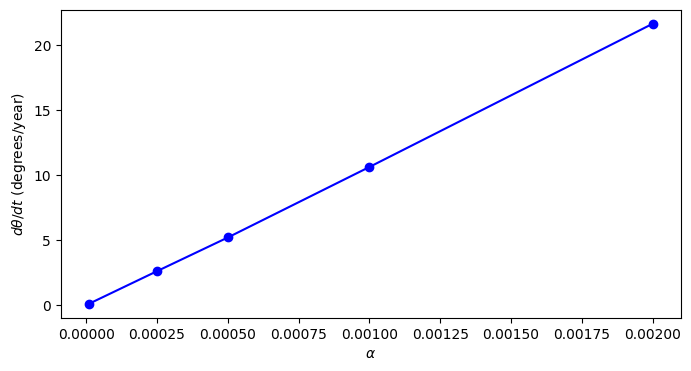

In [12]:
# First we define an array for which we want to calulate the precession rates.
alpha_array = np.array([0.00001,0.00025,0.0005,0.001,0.002])
dthetadt = np.zeros(len(alpha_array)) # to store precession rates for different alphas

# We look over each
for k in range(len(alpha_array)):

    # simulation parameters
    pi = np.pi
    ti = 0 # start from zero time
    tf = 1.0 # years

    dt = 0.0001 # about a week step size
    N = int(tf/dt) # no steps

    t = np.zeros(N)
    x = np.zeros(N)
    y = np.zeros(N)
    vx = np.zeros(N)
    vy = np.zeros(N)
    r  = np.zeros(N)

    x[0] = 0.47 # AU
    y[0] = 0.0 # AU
    vx[0] = 0.0
    vy[0] = 8.2 # AU/yr

    GM = 4*pi**2
    alpha = alpha_array[k]

    for i in range(N-1):
        r[i] = np.sqrt(x[i]**2 + y[i]**2)
        rcube = r[i]**3
        rsq = x[i]**2 + y[i]**2
        
        vx[i+1] = vx[i] - (GM*x[i]/rcube)*(1 + (alpha/rsq))*dt
        x[i+1]  = x[i]  + vx[i+1]*dt

        vy[i+1] = vy[i] - (GM*y[i]/rcube)*(1 + (alpha/rsq))*dt
        y[i+1]  = y[i]  + vy[i+1]*dt

        t[i+1] = t[i] + dt

    # Now we run the sign change detection loop. It tells us where the sign of dr/dt changes.
    # We store the indexs where dr/dt changes sign.

    index = np.zeros(8)
    j=0

    # sign change detection loop
    for i in range(N-2):
        drdt_current = (r[i+1]-r[i])
        drdt_next = (r[i+2]-r[i+1])

        if drdt_current*drdt_next < 0.0:
            index[j]=i
            j=j+1

    # But since dr/dt changes sign twice every cycle. First at perhelion then at aphelion. So we only need
    # odd index (i.e every other index starting from 1). So we slice thorugh them.
    index = index[1::2]


    # Now we calculate precession angles and the time of each cycle. And store them for later use.
    theta_precess = np.zeros(len(index)) # precession angle
    t_precess = np.zeros(len(index))  # time of cylce completion.

    j=0  # loop index

    pi = np.pi
    for i in index:
        i = int(i)
        theta = np.arctan(y[i]/x[i])
        if theta<0:
            theta_precess[j] = 180+theta*180/pi
        else:
            theta_precess[j] = theta*180/pi
        t_precess[j] = t[i]
        j = j+1

    # Since we have theta and t. We calculate slope of theta-t graph using linear fitting.
    res = linregress(t_precess,theta_precess)
    slope = res.slope
    dthetadt[k] = slope
    # print(res.slope)

# Now we fit the precession rates for differnt value of alpha liearly.
res = linregress(alpha_array,dthetadt)
slope = res.slope # slope of fitting

plt.figure(figsize=(8,4))
plt.xlabel('$ \\alpha $')
plt.ylabel('$ d \\theta / dt $ (degrees/year)')
plt.plot(alpha_array,dthetadt,'bo-')

In [13]:
# Now the alpha we want to find out the precession reate is 1.1x10^(-8)

alpha = 1.1*10**(-8)
precession_rate = slope*alpha*100*60*60 # factor to convert year to century and degree to arcsecond
print(precession_rate)

43.01514471361749


So we have found $\frac{d \theta}{dt} = 43.015$ arcsecond/century.

---

## Part (b)
Dependence of precession on eccenticity

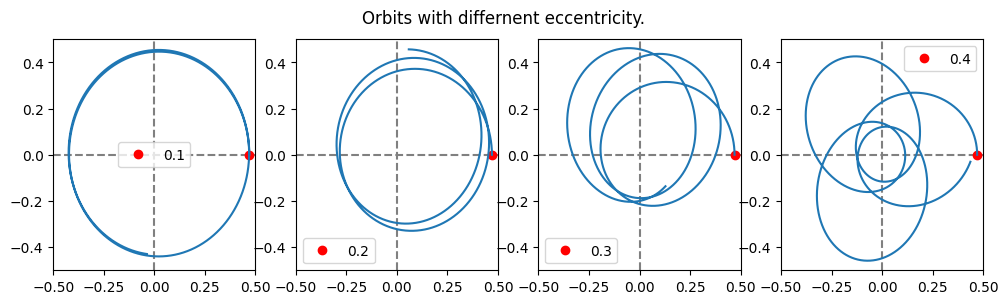

In [24]:
# simulation parameters
pi = np.pi
ti = 0 # start from zero time
tf = 0.5 # years

dt = 0.0001 # about a week step size
N = int(tf/dt) # no steps

t = np.zeros(N)
x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
r  = np.zeros(N)

e = 0.3

GM = 4*pi**2
alpha = 0.01

e_array = np.array([0.1,0.2,0.3,0.4])

plt.figure(figsize=(12,3))
for k in range(len(e_array)):
    e = e_array[k]
    a = 0.3870
    x[0] = 0.47 # AU
    y[0] = 0.0 # AU
    vx[0] = 0.0
    vy[0] = np.sqrt(GM*(1-e)/(a*(1+e))) # AU/yr


    for i in range(N-1):
        r[i] = np.sqrt(x[i]**2 + y[i]**2)
        rcube = r[i]**3
        rsq = x[i]**2 + y[i]**2
        
        vx[i+1] = vx[i] - (GM*x[i]/rcube)*(1 + (alpha/rsq))*dt
        x[i+1]  = x[i]  + vx[i+1]*dt

        vy[i+1] = vy[i] - (GM*y[i]/rcube)*(1 + (alpha/rsq))*dt
        y[i+1]  = y[i]  + vy[i+1]*dt

        # xhalf = x[i] + vx[i]*dt/2
        # vx[i+1] = vx[i] - (GM*xhalf/rcube)*(1 + (alpha/rsq))*dt
        # x[i+1]  = xhalf  + vx[i+1]*dt/2

        # yhalf = y[i] + vy[i]*dt/2
        # vy[i+1] = vy[i] - (GM*yhalf/rcube)*(1 + (alpha/rsq))*dt
        # y[i+1]  = yhalf  + vy[i+1]*dt/2

        t[i+1] = t[i] + dt

    # ax=plt.gca()
    # ax.set_aspect(1)
    plt.subplot(1,4,k+1)
    plt.axhline(0,c='grey',ls='--')
    plt.axvline(0,c='grey',ls='--')
    plt.plot(x[0],y[0],'ro',label=str(e))
    plt.plot(x,y)   
    plt.legend()
    plt.xlim(-0.5,0.5)
    plt.ylim(-0.5,0.5)

plt.suptitle('Orbits with differnent eccentricity.')
plt.legend()

Since all the simulations were run for same time. We see that orbits with larger eccentricity precess faster.